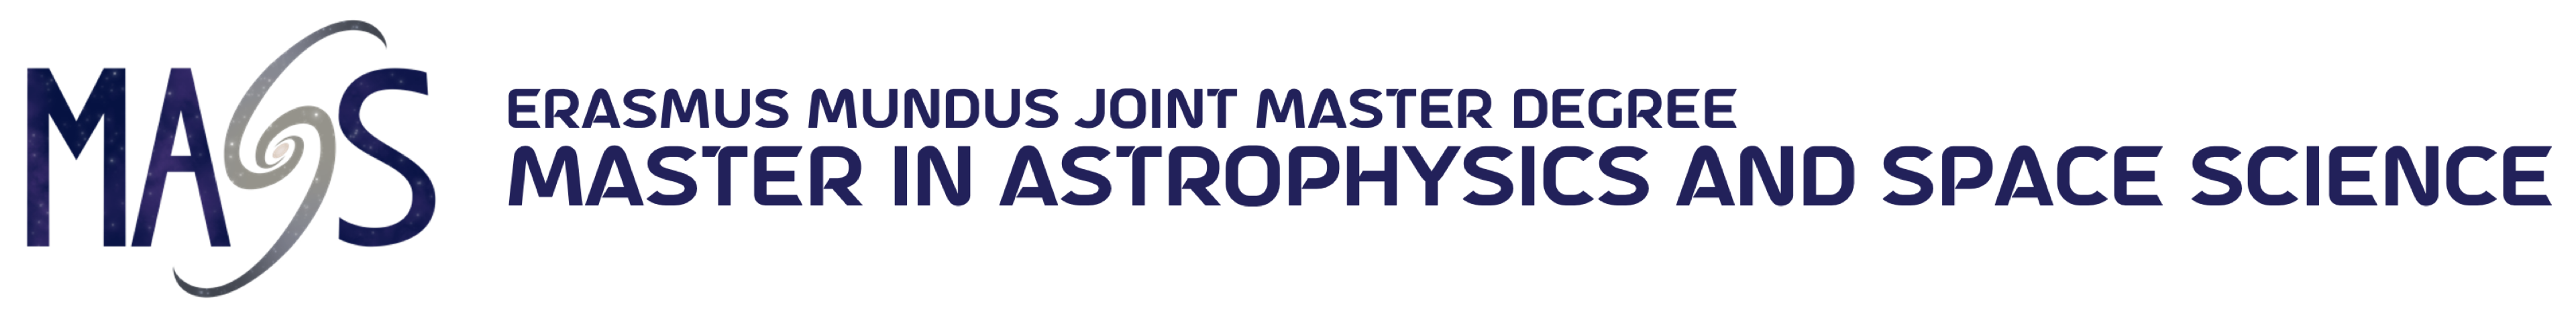
# AGNs Tutorial 5
## Finding the mass of a Black Hole

17 May 2024

**Student:** Francesca Borg

**Instructors:** Prof. Dragana Ilic, Natasa Pavlov

The ultimate goal of this tutorial is to find the mass of a BH using two different methods for a dataset of 500 SDSS quasars with spectral parameters measured by Shen et al. (2011).

### 1. Reverberation Mapping
Delayed responde (i.e., time-lag) of different line emitting regions to the continuum variability occuring in the accretion disk is used to determine the radial distance of this emitting region from the central source ($\mathrm{R_{BLR}}$).

### 2. Host Bulge Luminosity
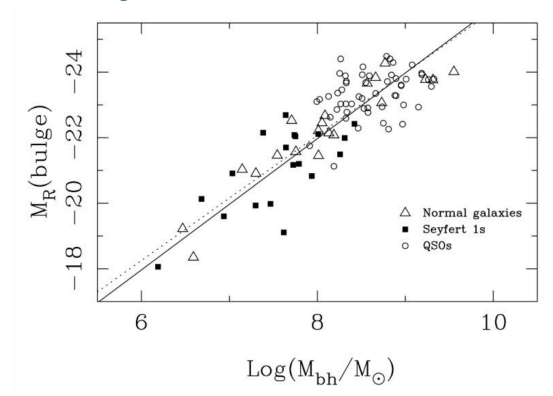
Source: McLure & Dunlop (2002).

In [1]:
#importing the necessary packages
import numpy as np
import pandas as pd
from astropy import cosmology
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import rcParams # for setting plot parameters in advance
import seaborn as sns

# filters for different databases
#from speclite import filters

#astroquery - for query search many data archives directly from Jupyter notebook
from astroquery.sdss import SDSS
from astroquery.gaia import Gaia

#other (might not be required)
from tabulate import tabulate
from astropy.table import Table

%matplotlib inline

### Q.1 Estimate $M_\mathrm{BH}$ using reverberation mapping studies

**Estimate $M_{BH}$ using scaling relations derived from reverberation mapping studies + estimation of accretion rate.**

Using the data sample of 500 SDSS quasars with spectral parameters measured by Shen at al. (2011) from the file _shen_subsample_500.csv_. First, we crossmatch with SDSS using the identification number _(mjd, plate, fiber)_ to obtain the H$\beta$ flux and redshift.

In [2]:
# import the data
shen = pd.read_csv('shen_subsample_500.csv', header=0)
shen

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,2350.9,189.0,95.5,6.1,19.90,7.66,0.07,-0.78
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,7081.5,352.0,61.5,6.0,17.75,8.65,0.04,-1.70
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,7229.1,2223.1,18.5,3.5,20.12,8.77,0.27,-1.62
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,4799.4,489.0,98.2,4.9,35.73,8.62,0.09,-1.05
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,7272.0,420.5,88.0,5.0,20.90,8.79,0.05,-1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,5923.8,248.2,64.5,3.0,17.00,8.45,0.04,-1.60
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,2310.5,491.6,81.2,7.7,21.06,7.72,0.18,-0.69
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,2330.9,40.9,61.5,3.0,31.31,7.84,0.02,-0.58
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,8071.8,309.5,55.7,2.8,23.05,8.80,0.03,-1.79


The following cross-match query was submitted to the SDSS Cross-ID tool at [2], along with the *shen_subsample_500.csv* data:

```
SELECT s.plate, s.mjd, s.fiberid,
s.z as redshift, i.subclass, i.e_bv_sfd, g.h_beta_flux

FROM #upload u
      JOIN SpecObjAll AS s ON (s.plate=u.up_plate AND s.mjd=u.up_mjd AND s.fiberID=u.up_fiber)
JOIN GalSpecLine AS g ON s.specobjid=g.specobjid
JOIN GalSpecInfo AS i ON s.specobjid=i.specobjid
```

The results obtained from the query are contained in _Skyserver_results.csv_ and displayed below.

In [3]:
# import the data
skyserver = pd.read_csv('Skyserver_results.csv', header=0)
skyserver

,plate,mjd,fiber,redshift,subclass,e_bv_sfd,h_beta_flux
0,294,51986,194,0.170193,STARBURST BROADLINE,0.018595,1226.00900
1,294,51986,260,0.207837,STARBURST BROADLINE,0.021809,131.78020
2,294,51986,299,0.234611,BROADLINE,0.021208,66.01272
3,294,51986,528,0.275446,STARBURST BROADLINE,0.026141,556.11180
4,298,51955,103,0.296086,BROADLINE,0.026661,159.79340
...,...,...,...,...,...,...,...
495,2789,54555,231,0.204802,BROADLINE,0.023648,155.79820
496,2791,54556,520,0.222684,STARBURST BROADLINE,0.042414,973.65030
497,2792,54556,89,0.170544,STARBURST BROADLINE,0.027101,1935.62300
498,2947,54533,473,0.284733,BROADLINE,0.020062,54.41901


In [4]:
#Sanity check: Note that our two datasets are of the same length
print('length of shen table:', len(shen))
print('length of skyserver table:', len(skyserver))

length of shen table: 500
length of skyserver table: 500


Next, we combine both tables into a single dataframe. Note that both datasets have already been sorted in Excel into ascending order first by 'plate', then by 'fiber', and consistency of data between the two was checked visually.

In [5]:
#combine both tables into a single dataframe
df = shen.merge(skyserver, left_on=['plate', 'fiber', 'mjd'], right_on=['plate', 'fiber','mjd'], how='inner')
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,redshift,subclass,e_bv_sfd,h_beta_flux
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,95.5,6.1,19.90,7.66,0.07,-0.78,0.170193,STARBURST BROADLINE,0.018595,1226.00900
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,61.5,6.0,17.75,8.65,0.04,-1.70,0.207837,STARBURST BROADLINE,0.021809,131.78020
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,18.5,3.5,20.12,8.77,0.27,-1.62,0.234611,BROADLINE,0.021208,66.01272
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,98.2,4.9,35.73,8.62,0.09,-1.05,0.275446,STARBURST BROADLINE,0.026141,556.11180
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,88.0,5.0,20.90,8.79,0.05,-1.61,0.296086,BROADLINE,0.026661,159.79340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,64.5,3.0,17.00,8.45,0.04,-1.60,0.204802,BROADLINE,0.023648,155.79820
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,81.2,7.7,21.06,7.72,0.18,-0.69,0.222684,STARBURST BROADLINE,0.042414,973.65030
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,61.5,3.0,31.31,7.84,0.02,-0.58,0.170544,STARBURST BROADLINE,0.027101,1935.62300
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,55.7,2.8,23.05,8.80,0.03,-1.79,0.284733,BROADLINE,0.020062,54.41901


In [6]:
df.columns

Index(['RAJ2000', 'DEJ2000', 'plate', 'fiber', 'mjd', 'iMAG', 'logLbol',
       'e_logLbol', 'logLBHb', 'e_logLBHb', 'W_BHb_', 'e_W_BHb_', 'EWBHb',
       'e_EWBHb', 'SN_Hb_', 'logBH', 'e_logBH', 'logEdd', 'redshift',
       'subclass', 'e_bv_sfd', 'h_beta_flux'],
      dtype='object')

The columns present in `df` are defined in Shen et al. (2011):
- `RAJ2000` and `DEJ2000` are the right ascension and declination (units: degrees)
- `iMAG` is the I-band magnitude
- `logLbol` and `e_logLbol` are the bolometric luminosity and associated error (units: erg s$^{-1}$)
- `logLBHb` and `e_logLBHb` are the luminosity of the broad H-$\beta$ line and its associated error (units: erg s$^{-1}$)
- `W_BHb_` and `e_W_BHb_` are the FWHM of the broad H-$\beta$ line and its associated error (units: km s$^{-1}$)
- `EWBHb` and `e_EWBHb` are the rest-frame equivalent width of the broad H-$\beta$ line and its associated error (units: 0.1 nm)
- `SN_Hb_` is the median signal-to-noise per pixel for the rest frame 4750-4950 $\AA$ region
- `logBH` and `e_logBH` are the adopted fiducial virial black hole mass and its associated error (units: $M_\odot$)
- `logEdd` is the eddington ratio based on the fiducial virial black hole mass
- `plate`, `fiber`, `mjd`, `redshift`, `subclass`, `e_bv_sfd` and `h_beta_flux` are the respective properties as defined by SDSS

In [7]:
#rename these columns to be more meaningful

df.rename(columns={  'logLBHb': 'log_broad_L_hbeta',  # H_beta broad lum
                     'e_logLBHb': 'log_broad_L_hbeta_err',  # H_beta broad lum error
                     'W_BHb_': 'FWHM_hbeta', 
                     'e_W_BHb_': 'FWHM_hbeta_err', 
                     'EWBHb': 'EW_hbeta',
                     'e_EWBHb': 'EW_hbeta_err',
                     'SN_Hb_': 'SN_hbeta', 
                     'logBH': 'log_BH_mass',
                     'e_logBH': 'log_BH_mass_err'
                     }, inplace=True)

In [8]:
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,EW_hbeta,EW_hbeta_err,SN_hbeta,log_BH_mass,log_BH_mass_err,logEdd,redshift,subclass,e_bv_sfd,h_beta_flux
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,95.5,6.1,19.90,7.66,0.07,-0.78,0.170193,STARBURST BROADLINE,0.018595,1226.00900
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,61.5,6.0,17.75,8.65,0.04,-1.70,0.207837,STARBURST BROADLINE,0.021809,131.78020
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,18.5,3.5,20.12,8.77,0.27,-1.62,0.234611,BROADLINE,0.021208,66.01272
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,98.2,4.9,35.73,8.62,0.09,-1.05,0.275446,STARBURST BROADLINE,0.026141,556.11180
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,88.0,5.0,20.90,8.79,0.05,-1.61,0.296086,BROADLINE,0.026661,159.79340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,64.5,3.0,17.00,8.45,0.04,-1.60,0.204802,BROADLINE,0.023648,155.79820
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,81.2,7.7,21.06,7.72,0.18,-0.69,0.222684,STARBURST BROADLINE,0.042414,973.65030
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,61.5,3.0,31.31,7.84,0.02,-0.58,0.170544,STARBURST BROADLINE,0.027101,1935.62300
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,55.7,2.8,23.05,8.80,0.03,-1.79,0.284733,BROADLINE,0.020062,54.41901


### Exploratory plots

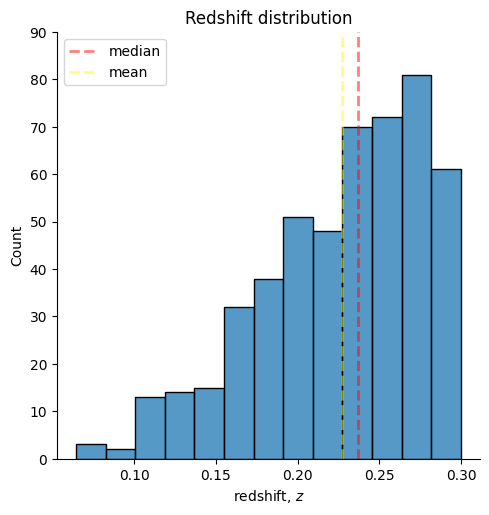

In [9]:
#plot redshift distribution

sns.displot(data=df, x='redshift')
plt.title('Redshift distribution')
plt.xlabel('redshift, $z$')

#plot median and mean
plt.vlines(df['redshift'].median(), 0, 100, color='red', ls='--', linewidth=2, alpha=0.5, label='median')
plt.vlines(df['redshift'].mean(), 0, 100, color='yellow', ls='--', linewidth=2, alpha=0.5, label='mean')

plt.ylim(0,90)
plt.legend()


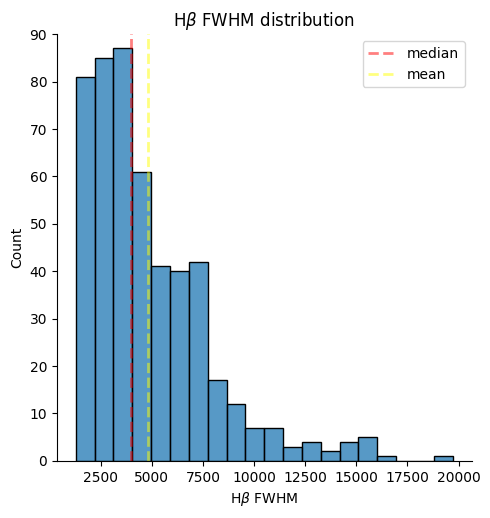

In [10]:
# plot H-beta FWHM distribution

sns.displot(data=df, x='FWHM_hbeta')
plt.title(r'H$\beta$ FWHM distribution')
plt.xlabel(r'H$\beta$ FWHM')

#plot median and mean
plt.vlines(df['FWHM_hbeta'].median(), 0, 100, color='red', ls='--', linewidth=2, alpha=0.5, label='median')
plt.vlines(df['FWHM_hbeta'].mean(), 0, 100, color='yellow', ls='--', linewidth=2, alpha=0.5, label='mean')

plt.ylim(0,90)
plt.legend()

Text(0.5, 0, 'I-band magnitude [mag]')

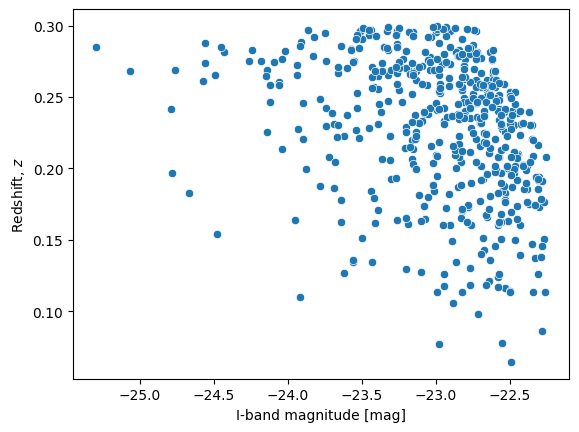

In [11]:
#plot i-band magnitude vs. redshift

sns.scatterplot(data=df, x='iMAG', y='redshift')
plt.ylabel('Redshift, $z$')
plt.xlabel('I-band magnitude [mag]')

In [12]:
df[['redshift', 'FWHM_hbeta', 'iMAG']].describe()

,redshift,FWHM_hbeta,iMAG
count,500.000000,500.000000,500.00000
mean,0.226942,4825.009600,-22.98284
std,0.049635,2975.763737,0.52241
min,0.064495,1281.100000,-25.30000
25%,0.193991,2621.675000,-23.25000
50%,0.236845,3997.300000,-22.84000
75%,0.267921,6338.725000,-22.60000
max,0.299768,19717.100000,-22.25000


**Sample limitations:**
- redshift distribution is not evenly distributed around the mean, but rather skewed towards higher redshift, but the standard deviation is small than that for the FWHM distribution.
- there is very large variance in the H$\beta$ FWHM values, the data distribution is not evenly distributed around the mean, but rather skewed towards lower FWHM values, with with a tail extending towards higher FWHM values.
- I-band magnitudes are quite closely distributed around the mean, with small standard deviation, but the distribution is again skewed, towards less negative values (the right side of the scatter plot is more populated).

This means that our sample of 500 quasars preferentially contains fainter AGNs located at higher redshifts.

### Find the luminosity of the H$\beta$ line

First we need to calculate the luminosity distance $D_L$ for each object using the formula (24) in Hogg (2000):

$$\nu S_\nu = \dfrac{\nu_e L_{\nu_e}}{4\pi D_L^2}$$

where:
- $\nu$ is the frequency of the line
- $S_\nu$ is the differential flux
- $\nu_e=(1+z)\nu$ is the emitted frequency corrected using redshift
- $L_{\nu_e}$ is the differential luminosity at the frequency $\nu$

Therefore, the luminosity of the H$\beta$ line can be found from:

$$L_{\nu_e} = \dfrac{\nu S_\nu 4\pi D_L^2}{\nu_e} = \dfrac{4\pi S_\nu D_L^2}{1+z} $$


For cosmological constants, we use ones from Planck:
- $H_0=67.8$ km/s Mpc
- matter density, $\Omega_m$=0.31
- dark energy density, $\Omega_\lambda$=0.69
- $T_{\mathrm{CMB}}=2.726$ K

and use `astropy` to find the luminosity distances.

In [13]:
#define cosmological constants
H0 = 67.8
omega_m = 0.31
omega_lambda = 0.69

#define the cosmology
cosm_model = cosmology.FlatLambdaCDM(H0=H0*u.km/(u.s*u.Mpc), Tcmb0 = 2.726*u.K, Om0=omega_m)

In [14]:
D_L = cosm_model.luminosity_distance(df['redshift'])
D_L

<Quantity [ 844.82702779, 1054.68057041, 1208.54704369, 1450.2759069 ,
           1575.58508815, 1272.65153335, 1225.09215034, 1328.50175264,
           1206.06856355, 1268.02094825,  806.17203423, 1338.58279244,
           1349.23049854, 1121.47416842, 1313.12977771, 1577.38355064,
           1169.21366032, 1108.04063517, 1239.44600613, 1572.13806221,
           1391.93690742, 1299.01490772,  866.83839613, 1141.19142271,
           1488.09452836, 1439.38507251, 1329.13820153, 1591.97370617,
           1242.40584058,  661.76618788,  617.6175851 , 1528.57855355,
           1091.78671846,  792.59472814, 1236.80465421, 1161.82238582,
           1172.67242125,  928.35308414, 1392.17464886, 1060.78518283,
           1369.55994049, 1580.80653828, 1410.90309211, 1100.15654266,
            992.19949186,  966.73538396, 1433.92193953, 1255.36229955,
           1263.25922903, 1569.94261836, 1572.83493349, 1073.27584873,
            914.06736059,  653.99808796, 1386.92704649, 1320.00849482,
      

In [15]:
df['D_L']=D_L
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,EW_hbeta_err,SN_hbeta,log_BH_mass,log_BH_mass_err,logEdd,redshift,subclass,e_bv_sfd,h_beta_flux,D_L
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,6.1,19.90,7.66,0.07,-0.78,0.170193,STARBURST BROADLINE,0.018595,1226.00900,844.827028
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,6.0,17.75,8.65,0.04,-1.70,0.207837,STARBURST BROADLINE,0.021809,131.78020,1054.680570
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,3.5,20.12,8.77,0.27,-1.62,0.234611,BROADLINE,0.021208,66.01272,1208.547044
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,4.9,35.73,8.62,0.09,-1.05,0.275446,STARBURST BROADLINE,0.026141,556.11180,1450.275907
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,5.0,20.90,8.79,0.05,-1.61,0.296086,BROADLINE,0.026661,159.79340,1575.585088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,3.0,17.00,8.45,0.04,-1.60,0.204802,BROADLINE,0.023648,155.79820,1037.476704
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,7.7,21.06,7.72,0.18,-0.69,0.222684,STARBURST BROADLINE,0.042414,973.65030,1139.541941
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,3.0,31.31,7.84,0.02,-0.58,0.170544,STARBURST BROADLINE,0.027101,1935.62300,846.747879
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,2.8,23.05,8.80,0.03,-1.79,0.284733,BROADLINE,0.020062,54.41901,1506.403426


In [16]:
#function to calculate Luminosity using this formula:

def lum(D_L, S, z):
    # D_L = luminosity distance from cosmological model (units: Mpc)
    # S = flux (units: 1e-17 erg s^-1 cm^-2)
    # z = redshift

    # convert D_L from Mpc to cm:
    D_L_cm = D_L * 3.086e24
    #convert D from 1e-17 erg s^-1 cm^-2 to erg s^-1 cm^-2
    S_base = S*1e-17
    
    L= 4 * np.pi * S_base * D_L_cm**2/(1+z)
    
    return L # in erg s^-1

In [72]:
#find luminosity of H_beta line
df['L_hbeta']=df.apply(lambda data: lum(data['D_L'], data['h_beta_flux'], data['redshift']), axis=1)

df['logL_hbeta']=df.apply(lambda data: np.log10(data['L_hbeta']), axis=1)

df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,h_beta_flux,D_L,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu,M_BH_Shen,Edd,logL_hbeta
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,1226.00900,844.827028,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.389549,4.570882e+07,0.165959,41.951773
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,131.78020,1054.680570,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.022719,4.466836e+08,0.019953,41.162086
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,66.01272,1208.547044,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.018684,5.888437e+08,0.023988,40.970626
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,556.11180,1450.275907,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.100387,4.168694e+08,0.089125,42.040403
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,159.79340,1575.585088,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.029781,6.165950e+08,0.024547,41.563810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,155.79820,1037.476704,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.034062,2.818383e+08,0.025119,41.221605
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,973.65030,1139.541941,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.451742,5.248075e+07,0.204174,42.092551
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,1935.62300,846.747879,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.465632,6.918310e+07,0.263027,42.151943
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,54.41901,1506.403426,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.016116,6.309573e+08,0.016218,41.060822


### Find the BH mass

Using the empirical relation relating the mass of a BH to its H$\beta$ luminosity (2) in Wu (2009):

$$M_{BH}=2.4 \times 10^6 \left(\dfrac{L_{H\beta}}{10^{42}~\mathrm{ergs~s^{-1}}}\right)^{0.59} \left(\dfrac{\mathrm{FWHM_{H\beta}}}{10^3~\mathrm{km~s^{-1}}}\right)^2 \mathrm{M_\odot}$$

we can calculate the BH mass using the luminosity $L_{H\beta}$ and FWHM of H$\beta$.

This empirical relation was derived under the **assumption** of virialized gas around the BH.

In [18]:
#define function to find BH mass

def find_BHmass_Wu(L_hbeta, FWHM_hbeta):
    
    #L_hbeta = H-beta luminosity (units: erg s^-1)
    #FWHM_hbeta = H-beta full-width at half-maximum (units: km s^-1)
    
    m_BH = 2.4e6 * (L_hbeta/1e42)**0.59 * (FWHM_hbeta/1e3)**2
    
    return m_BH # in M_Sun

In [101]:
df['M_BH_Wu']=df.apply(lambda data: find_BHmass_Wu(data['L_hbeta'], data['FWHM_hbeta']), axis=1)
df['logM_BH_Wu']=df.apply(lambda data: np.log10(data['M_BH_Wu']), axis=1)
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu,M_BH_Shen,Edd,logL_hbeta,logEdd_ratio_Wu,logM_BH_Wu
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.389549,4.570882e+07,0.165959,41.951773,-0.409438,7.094226
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.022719,4.466836e+08,0.019953,41.162086,-1.643611,7.586092
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.018684,5.888437e+08,0.023988,40.970626,-1.728540,7.491049
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.100387,4.168694e+08,0.089125,42.040403,-0.998323,7.766423
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.029781,6.165950e+08,0.024547,41.563810,-1.526064,7.846167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.034062,2.818383e+08,0.025119,41.221605,-1.467729,7.466159
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.451742,5.248075e+07,0.204174,42.092551,-0.345109,7.162228
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.465632,6.918310e+07,0.263027,42.151943,-0.331958,7.204905
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.016116,6.309573e+08,0.016218,41.060822,-1.792743,7.640037


To estimate the Eddington luminosity and Eddington ratio, we need to find the bolometric luminosity.

Using empirical relation (8) from Wu 2009:

$$\log{L_{bol}}=0.94\pm0.03\log{L_{H\beta}}+5.39\pm1.14$$

In [28]:
def find_logLbol_Wu(L_hbeta):
    #L_hbeta = Luminosity of the H-beta line (units: erg s^-1)
    logLbol = 0.94 * np.log10(L_hbeta) + 5.39
    return logLbol #in erg s^-1

In [29]:
df['logLbol_Wu']=df.apply(lambda data: find_logLbol_Wu(data['L_hbeta']), axis=1)
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,redshift,subclass,e_bv_sfd,h_beta_flux,D_L,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,0.170193,STARBURST BROADLINE,0.018595,1226.00900,844.827028,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.000348
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,0.207837,STARBURST BROADLINE,0.021809,131.78020,1054.680570,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.000020
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,0.234611,BROADLINE,0.021208,66.01272,1208.547044,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.000017
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,0.275446,STARBURST BROADLINE,0.026141,556.11180,1450.275907,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.000090
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,0.296086,BROADLINE,0.026661,159.79340,1575.585088,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,0.204802,BROADLINE,0.023648,155.79820,1037.476704,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.000030
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,0.222684,STARBURST BROADLINE,0.042414,973.65030,1139.541941,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.000403
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,0.170544,STARBURST BROADLINE,0.027101,1935.62300,846.747879,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.000416
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,0.284733,BROADLINE,0.020062,54.41901,1506.403426,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.000014


We can now find the Eddington luminosity as calculated in Section 4.1 of Wu (2009):

$$L_{Edd}=1.38\times 10^{38} M_{BH}/M_\odot$$

In [30]:
def find_Ledd(M_BH):
    #M_BH = mass of the black hole (units: M_Sun)
    Ledd = 1.38e38*M_BH
    return Ledd #in erg s^-1

In [31]:
df['Ledd_Wu']=df.apply(lambda data: find_Ledd(data['M_BH_Wu']), axis=1)
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,redshift,subclass,e_bv_sfd,h_beta_flux,D_L,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,0.170193,STARBURST BROADLINE,0.018595,1226.00900,844.827028,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.000348
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,0.207837,STARBURST BROADLINE,0.021809,131.78020,1054.680570,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.000020
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,0.234611,BROADLINE,0.021208,66.01272,1208.547044,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.000017
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,0.275446,STARBURST BROADLINE,0.026141,556.11180,1450.275907,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.000090
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,0.296086,BROADLINE,0.026661,159.79340,1575.585088,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,0.204802,BROADLINE,0.023648,155.79820,1037.476704,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.000030
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,0.222684,STARBURST BROADLINE,0.042414,973.65030,1139.541941,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.000403
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,0.170544,STARBURST BROADLINE,0.027101,1935.62300,846.747879,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.000416
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,0.284733,BROADLINE,0.020062,54.41901,1506.403426,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.000014


and the Eddington ratio, which is also defined in Section 4.1 as:

$$\dfrac{L_{bol}}{L_{Edd}}$$

In [34]:
def find_edd_ratio(logLbol, Ledd):
    
    #logLbol = log bolometric luminosity
    #Ledd = eddingtion luminosity (units: erg s^-1)
    
    Lbol = 10**logLbol #in erg s^-1
    edd_ratio = Lbol/Ledd
    
    return edd_ratio

In [99]:
df['Edd_ratio_Wu']=df.apply(lambda data: find_edd_ratio(data['logLbol_Wu'], data['Ledd_Wu']), axis=1)
df['logEdd_ratio_Wu']=df.apply(lambda data:np.log10(data['Edd_ratio_Wu']), axis=1)
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,D_L,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu,M_BH_Shen,Edd,logL_hbeta,logEdd_ratio_Wu
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,844.827028,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.389549,4.570882e+07,0.165959,41.951773,-0.409438
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,1054.680570,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.022719,4.466836e+08,0.019953,41.162086,-1.643611
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,1208.547044,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.018684,5.888437e+08,0.023988,40.970626,-1.728540
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,1450.275907,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.100387,4.168694e+08,0.089125,42.040403,-0.998323
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,1575.585088,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.029781,6.165950e+08,0.024547,41.563810,-1.526064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,1037.476704,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.034062,2.818383e+08,0.025119,41.221605,-1.467729
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,1139.541941,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.451742,5.248075e+07,0.204174,42.092551,-0.345109
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,846.747879,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.465632,6.918310e+07,0.263027,42.151943,-0.331958
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,1506.403426,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.016116,6.309573e+08,0.016218,41.060822,-1.792743


In [37]:
#check values
df['Edd_ratio_Wu'].describe()

count    500.000000
mean       0.214559
std        0.272165
min        0.002264
25%        0.033687
50%        0.101342
75%        0.291672
max        1.568917
Name: Edd_ratio_Wu, dtype: float64

### Describing the AGNs

Comparing also with the results provided in Shen et al. (2011).

In [40]:
df.columns

Index(['RAJ2000', 'DEJ2000', 'plate', 'fiber', 'mjd', 'iMAG', 'logLbol',
       'e_logLbol', 'log_broad_L_hbeta', 'log_broad_L_hbeta_err', 'FWHM_hbeta',
       'FWHM_hbeta_err', 'EW_hbeta', 'EW_hbeta_err', 'SN_hbeta', 'log_BH_mass',
       'log_BH_mass_err', 'logEdd', 'redshift', 'subclass', 'e_bv_sfd',
       'h_beta_flux', 'D_L', 'L_hbeta', 'M_BH_Wu', 'logLbol_Wu', 'Ledd_Wu',
       'Edd_ratio_Wu'],
      dtype='object')

In [43]:
df['M_BH_Shen']=df.apply(lambda data: 10**(data['log_BH_mass']), axis=1)
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,subclass,e_bv_sfd,h_beta_flux,D_L,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu,M_BH_Shen
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,STARBURST BROADLINE,0.018595,1226.00900,844.827028,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.389549,4.570882e+07
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,STARBURST BROADLINE,0.021809,131.78020,1054.680570,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.022719,4.466836e+08
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,BROADLINE,0.021208,66.01272,1208.547044,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.018684,5.888437e+08
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,STARBURST BROADLINE,0.026141,556.11180,1450.275907,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.100387,4.168694e+08
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,BROADLINE,0.026661,159.79340,1575.585088,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.029781,6.165950e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,BROADLINE,0.023648,155.79820,1037.476704,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.034062,2.818383e+08
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,STARBURST BROADLINE,0.042414,973.65030,1139.541941,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.451742,5.248075e+07
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,STARBURST BROADLINE,0.027101,1935.62300,846.747879,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.465632,6.918310e+07
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,BROADLINE,0.020062,54.41901,1506.403426,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.016116,6.309573e+08


In [70]:
df[['M_BH_Shen', 'M_BH_Wu']].describe()

,M_BH_Shen,M_BH_Wu
count,5.000000e+02,5.000000e+02
mean,3.547066e+08,3.449634e+07
std,4.998727e+08,3.964676e+07
min,1.698244e+07,2.256458e+06
25%,7.762471e+07,1.201208e+07
50%,1.840894e+08,2.409193e+07
75%,4.265795e+08,4.257288e+07
max,4.466836e+09,3.901820e+08


Text(0.5, 1.0, 'Black hole mass distribution')

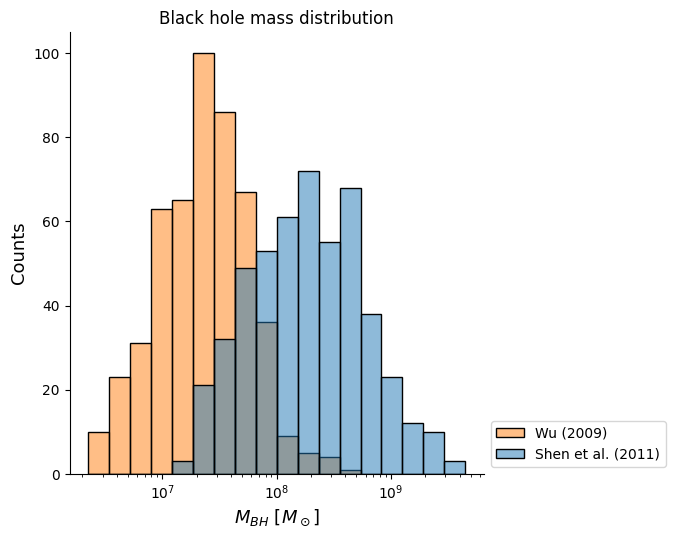

In [57]:
# plotting histogram of the obtained BH mass

sns.displot(data=df[['M_BH_Shen', 'M_BH_Wu']], log_scale=True, legend=False)

plt.ylabel('Counts', fontsize=13);
plt.xlabel(r'$M_{BH}~[M_\odot]$', fontsize=13);
plt.legend(['Wu (2009)', 'Shen et al. (2011)'], loc='lower left', bbox_to_anchor=(1, 0))
plt.title('Black hole mass distribution')

In [52]:
df.columns

Index(['RAJ2000', 'DEJ2000', 'plate', 'fiber', 'mjd', 'iMAG', 'logLbol',
       'e_logLbol', 'log_broad_L_hbeta', 'log_broad_L_hbeta_err', 'FWHM_hbeta',
       'FWHM_hbeta_err', 'EW_hbeta', 'EW_hbeta_err', 'SN_hbeta', 'log_BH_mass',
       'log_BH_mass_err', 'logEdd', 'redshift', 'subclass', 'e_bv_sfd',
       'h_beta_flux', 'D_L', 'L_hbeta', 'M_BH_Wu', 'logLbol_Wu', 'Ledd_Wu',
       'Edd_ratio_Wu', 'M_BH_Shen'],
      dtype='object')

In [66]:
df['Edd']=df.apply(lambda data: 10**(data['logEdd']), axis=1)
df

,RAJ2000,DEJ2000,plate,fiber,mjd,iMAG,logLbol,e_logLbol,log_broad_L_hbeta,log_broad_L_hbeta_err,...,e_bv_sfd,h_beta_flux,D_L,L_hbeta,M_BH_Wu,logLbol_Wu,Ledd_Wu,Edd_ratio_Wu,M_BH_Shen,Edd
0,196.80522,-0.60046,294,194,51986,-22.82,44.973,0.005,42.30,0.03,...,0.018595,1226.00900,844.827028,8.948978e+41,1.242298e+07,44.824667,1.714372e+45,0.389549,4.570882e+07,0.165959
1,195.89711,-0.82022,294,260,51986,-22.57,45.050,0.006,42.18,0.04,...,0.021809,131.78020,1054.680570,1.452398e+41,3.855602e+07,44.082360,5.320731e+45,0.022719,4.466836e+08,0.019953
2,195.60806,-1.08644,294,299,51986,-22.84,45.250,0.004,41.85,0.07,...,0.021208,66.01272,1208.547044,9.346011e+40,3.097770e+07,43.902389,4.274923e+45,0.018684,5.888437e+08,0.023988
3,196.98573,1.11934,294,528,51986,-24.18,45.672,0.002,43.01,0.02,...,0.026141,556.11180,1450.275907,1.097496e+42,5.840135e+07,44.907979,8.059386e+45,0.100387,4.168694e+08,0.089125
4,204.20462,-0.34926,298,103,51955,-23.33,45.272,0.005,42.57,0.02,...,0.026661,159.79340,1575.585088,3.662776e+41,7.017252e+07,44.459982,9.683808e+45,0.029781,6.165950e+08,0.024547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,220.06677,20.35394,2789,231,54555,-22.36,44.948,0.004,42.11,0.02,...,0.023648,155.79820,1037.476704,1.665733e+41,2.925224e+07,44.138309,4.036809e+45,0.034062,2.818383e+08,0.025119
496,224.66841,19.87184,2791,520,54556,-23.13,45.124,0.017,42.39,0.04,...,0.042414,973.65030,1139.541941,1.237517e+42,1.452875e+07,44.956998,2.004968e+45,0.451742,5.248075e+07,0.204174
497,227.30748,17.95278,2792,89,54556,-23.39,45.357,0.002,42.49,0.02,...,0.027101,1935.62300,846.747879,1.418871e+42,1.602894e+07,45.012826,2.211994e+45,0.465632,6.918310e+07,0.263027
498,220.11891,63.51298,2947,473,54533,-22.90,45.109,0.004,42.20,0.02,...,0.020062,54.41901,1506.403426,1.150329e+41,4.365530e+07,43.987173,6.024432e+45,0.016116,6.309573e+08,0.016218


In [69]:
df[['Edd', 'Edd_ratio_Wu']].describe()

,Edd,Edd_ratio_Wu
count,500.000000,500.000000
mean,0.139743,0.214559
std,0.168770,0.272165
min,0.003311,0.002264
25%,0.028840,0.033687
50%,0.074994,0.101342
75%,0.190546,0.291672
max,1.174898,1.568917


Text(0.5, 1.0, 'Eddington ratio distribution')

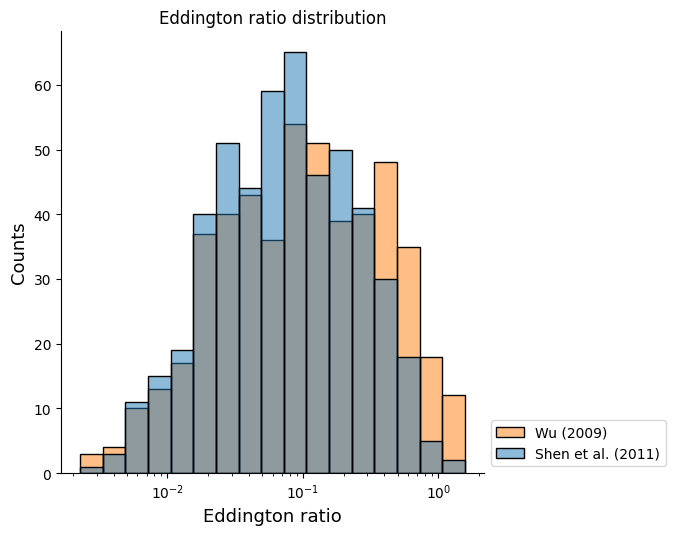

In [68]:
# plotting histogrm of the Eddington ratios

sns.displot(data=df[['Edd', 'Edd_ratio_Wu']], log_scale=True, legend=False)

plt.ylabel('Counts', fontsize=13);
plt.xlabel('Eddington ratio', fontsize=13);
plt.legend(['Wu (2009)', 'Shen et al. (2011)'], loc='lower left', bbox_to_anchor=(1, 0))
plt.title('Eddington ratio distribution')

Next we present our data following the format of Figure 2 from Wu (2009).

In [73]:
df.columns

Index(['RAJ2000', 'DEJ2000', 'plate', 'fiber', 'mjd', 'iMAG', 'logLbol',
       'e_logLbol', 'log_broad_L_hbeta', 'log_broad_L_hbeta_err', 'FWHM_hbeta',
       'FWHM_hbeta_err', 'EW_hbeta', 'EW_hbeta_err', 'SN_hbeta', 'log_BH_mass',
       'log_BH_mass_err', 'logEdd', 'redshift', 'subclass', 'e_bv_sfd',
       'h_beta_flux', 'D_L', 'L_hbeta', 'M_BH_Wu', 'logLbol_Wu', 'Ledd_Wu',
       'Edd_ratio_Wu', 'M_BH_Shen', 'Edd', 'logL_hbeta'],
      dtype='object')

In [84]:
#fitting best 1-dimensional line
fit = np.polyfit(df['logL_hbeta'], df['logLbol_Wu'], deg=1)
line = np.poly1d(fit)
#line(df['logL_hbeta'])

Text(0, 0.5, 'log $L_{bol}$')

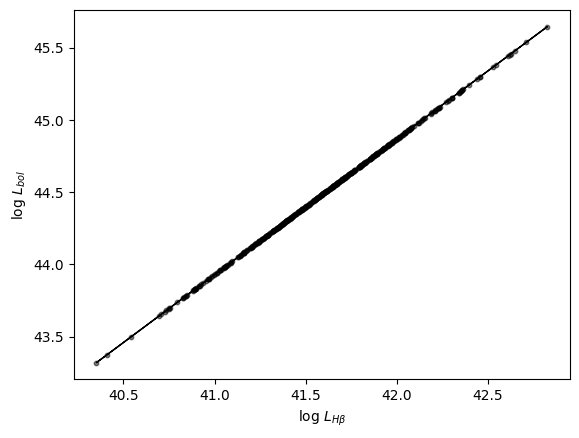

In [96]:
# plotting correlations between L_bol and L_Hbeta

plt.scatter(df['logL_hbeta'], df['logLbol_Wu'], color='black', s=10, alpha=0.5)

#plotting best fit line

plt.plot(df['logL_hbeta'], line(df['logL_hbeta']), color='black', linewidth=1)

plt.xlabel(r'log $L_{H\beta}$')
plt.ylabel(r'log $L_{bol}$')

From the figure we can see that the data is highly correlated with very narrow dispersion around the line of best fit.

Next, we present our results following the format of Figure 7 in McLure & Dunlop (2002).

In [102]:
df.columns

Index(['RAJ2000', 'DEJ2000', 'plate', 'fiber', 'mjd', 'iMAG', 'logLbol',
       'e_logLbol', 'log_broad_L_hbeta', 'log_broad_L_hbeta_err', 'FWHM_hbeta',
       'FWHM_hbeta_err', 'EW_hbeta', 'EW_hbeta_err', 'SN_hbeta', 'log_BH_mass',
       'log_BH_mass_err', 'logEdd', 'redshift', 'subclass', 'e_bv_sfd',
       'h_beta_flux', 'D_L', 'L_hbeta', 'M_BH_Wu', 'logLbol_Wu', 'Ledd_Wu',
       'Edd_ratio_Wu', 'M_BH_Shen', 'Edd', 'logL_hbeta', 'logEdd_ratio_Wu',
       'logM_BH_Wu'],
      dtype='object')

In [112]:
#fitting best 1-dimensional line
fit = np.polyfit(df['logEdd_ratio_Wu'], df['logM_BH_Wu'], deg=1)
line = np.poly1d(fit)
#line
#line(df['logEdd_ratio_Wu'])

Text(0, 0.5, 'log $M_{BH}$')

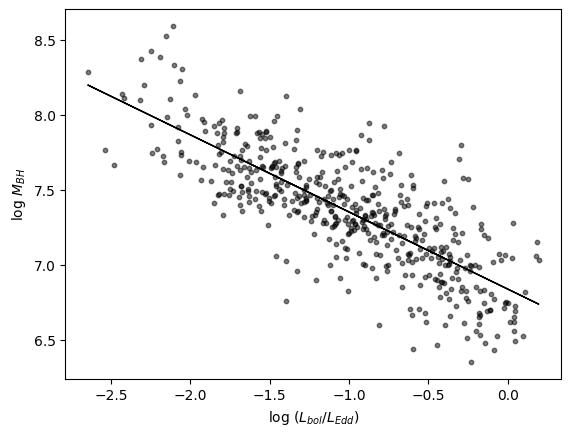

In [113]:
# plot BH mass vs. Eddington ratio

plt.scatter(df['logEdd_ratio_Wu'], df['logM_BH_Wu'], color='black', s=10, alpha=0.5)

#plotting best fit line

plt.plot(df['logEdd_ratio_Wu'], line(df['logEdd_ratio_Wu']), color='black', linewidth=1)

plt.xlabel(r'log ($L_{bol}$/$L_{Edd}$)')
plt.ylabel(r'log $M_{BH}$')

It is immedaitely evident from the figure that main difference is that the figure in McLura and Dunlop (2002) has a positive gradient (direct proportion), but our line of best fit has a negative gradient (inverse proportion).

### Q.2 Estimate $M_\mathrm{BH}$ using host bulge luminosity

**Estimate $M_{BH}$ from galactic host bulge luminosity + estimation of accretion rate.**

We will do this using the relation between black hole mass and host galaxy absolute magnitude in the R band given by equation (7) Wu (2009) and proposed by McLure & Dunlop (2002):

$$\log_{10}(M_{BH}/M_\odot)=-0.5M_R-2.74$$

where $M_R$ is the host galaxy absolute magnitude at $R$-band.

## References

- Hogg 2000; https://arxiv.org/abs/astro-ph/9905116
- McLure & Dunlop 2002; http://adsabs.harvard.edu/abs/2002MNRAS.331..795M
- Shen et al. 2011 paper; https://ui.adsabs.harvard.edu/abs/2011ApJS..194...45S/
abstract Shen et al. 2011 catalog; https://vizier.cds.unistra.fr/viz-bin/VizieR-3
- Wu 2009; http://adsabs.harvard.edu/abs/2009MNRAS.398.1905W
- NED database: https://ned.ipac.caltech.edu/
- SDSS DR18: https://skyserver.sdss.org/dr18/